In [38]:
import pandas as pd 
import numpy as np 
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, message="Downloading package") 

In [39]:
pip install textblob

In [40]:
df = pd.read_csv("en_coronavirus_03_04_2020_thru_03_27_2020.csv")

In [41]:
df.head(5)

,user_id,status_id,status_url,created_at,screen_name,text,source,is_quote,is_retweet,retweet_count
0,750502701457440768,1235354334923276289,https://twitter.com/RocketMan6510/status/12353...,2020-03-04T23:59:59Z,RocketMan6510,Here are the 6 confirmed #coronavirus cases in...,Twitter Web App,False,True,399
1,1694554160,1235354333602107393,https://twitter.com/mariomoraes51/status/12353...,2020-03-04T23:59:59Z,mariomoraes51,Find out how #ICT is playing a key role in hea...,Twitter for iPhone,False,True,422
2,866954221,1235354332842901506,https://twitter.com/Kath60276430/status/123535...,2020-03-04T23:59:59Z,Kath60276430,@WHO These #coronavirus case &amp; death count...,Twitter for Android,False,True,69
3,866954221,1235353059766697984,https://twitter.com/Kath60276430/status/123535...,2020-03-04T23:54:55Z,Kath60276430,"Yes, #coronavirus is a big concern, but some e...",Twitter for Android,False,True,480
4,866954221,1235354283589210112,https://twitter.com/Kath60276430/status/123535...,2020-03-04T23:59:47Z,Kath60276430,"Today's #coronavirus recap:\n\n-93,164 confirm...",Twitter for Android,False,True,1880


In [42]:
df.tail(5)

,user_id,status_id,status_url,created_at,screen_name,text,source,is_quote,is_retweet,retweet_count
305574,35769315,1243682163645530112,https://twitter.com/henrykleeKTVU/status/12436...,2020-03-27T23:31:48Z,henrykleeKTVU,Open roads as a result of the #coronavirus is ...,Twitter for iPhone,False,False,1
305575,521613339,1243682163154878464,https://twitter.com/Sneggals/status/1243682163...,2020-03-27T23:31:48Z,Sneggals,Republican Attorneys General push forward with...,Twitter Web App,False,False,0
305576,46988738,1243682163150618624,https://twitter.com/valadon2/status/1243682163...,2020-03-27T23:31:48Z,valadon2,'The essential thing was to save the greatest ...,Twitter for iPad,False,True,16
305577,1235576604488650752,1243682163117023232,https://twitter.com/bakura_yamimode/status/124...,2020-03-27T23:31:48Z,bakura_yamimode,"Although we are not sitting together, be rest ...",Twitter for Android,False,True,72
305578,1135867297,1243682161900826625,https://twitter.com/CHHammad91/status/12436821...,2020-03-27T23:31:48Z,CHHammad91,#CoronavirusPandemic #Italy has risen by 968 #...,Twitter for iPhone,False,False,0


In [43]:
print(df.shape)

(305579, 10)


In [44]:
print(df.columns)

Index(['user_id', 'status_id', 'status_url', 'created_at', 'screen_name',
       'text', 'source', 'is_quote', 'is_retweet', 'retweet_count'],
      dtype='object')


In [47]:
print(df.isnull)

<bound method DataFrame.isnull of                     user_id  \
0        750502701457440768   
1                1694554160   
2                 866954221   
3                 866954221   
4                 866954221   
...                     ...   
305574             35769315   
305575            521613339   
305576             46988738   
305577  1235576604488650752   
305578           1135867297   

                                                     text  \
0       Here are the 6 confirmed #coronavirus cases in...   
1       Find out how #ICT is playing a key role in hea...   
2       @WHO These #coronavirus case &amp; death count...   
3       Yes, #coronavirus is a big concern, but some e...   
4       Today's #coronavirus recap:\n\n-93,164 confirm...   
...                                                   ...   
305574  Open roads as a result of the #coronavirus is ...   
305575  Republican Attorneys General push forward with...   
305576  'The essential thing was to save the

In [ ]:
sentiments = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [22]:
print(sentiments)

0         0.156061
1         0.000000
2         0.000000
3         0.195833
4         0.293939
            ...   
305574    0.012500
305575    0.050000
305576    0.333333
305577    0.000000
305578   -0.125000
Name: text, Length: 305579, dtype: float64


In [ ]:
df = df.drop(columns=['status_id', 'status_url', 'created_at', 'screen_name', 'is_quote', 'is_retweet'])

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['retweet_count'], bins=20)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Retweet Count Distribution')
plt.show()


In [ ]:
sentiment_categories = sentiments.apply(categorize_sentiment)

print(sentiment_categories)

In [ ]:
df['sentiment_category'] = sentiment_categories

In [ ]:
df.head()

In [ ]:
df["sentiment_category"].unique()

In [ ]:
def sentiment_function(rating):
    if rating == "Extremely Positive":
        return "2"
    elif rating == "Positive":
        return "2"
    elif rating == "Extremely Negative":
        return "0"
    elif rating == "Negative":
        return "0"
    else:
        return "1"

In [26]:
df['sentiment analysis']=df['sentiment_category'].apply(lambda x:sentiment_function(x))

In [ ]:
df['sentiment analysis'].value_counts

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

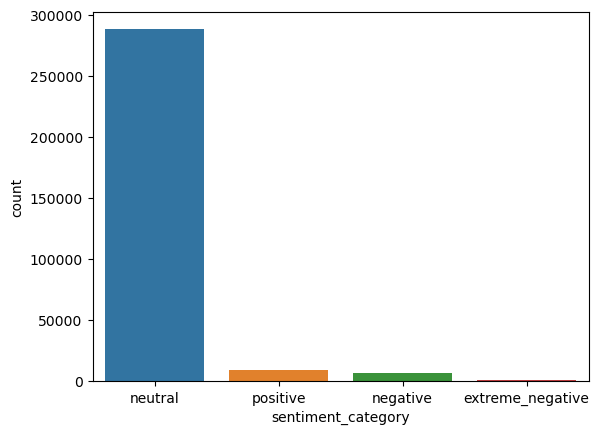

In [29]:
sns.countplot(x = 'sentiment_category', data = df)
plt.show()